<a href="https://colab.research.google.com/github/Rushp0/CS301-103/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Enviroment Setup
  * Download Kaggle API Credentials
  * Download CTR data from Kaggle
  * unzip train and test data into dataframes
  

In [ ]:
! touch kaggle.json
! echo "{\"username\":\"rushipatel037\",\"key\":\"7c892f94371ad1bfe35ffec08bf707d7\"}" > kaggle.json

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download files
! kaggle competitions download -c avazu-ctr-prediction

# unzip files
! mkdir data
! unzip avazu-ctr-prediction -d data


 98% 1.16G/1.19G [00:10<00:00, 164MB/s]
100% 1.19G/1.19G [00:10<00:00, 122MB/s]
Archive:  avazu-ctr-prediction.zip
  inflating: data/sampleSubmission.gz  
  inflating: data/test.gz            
  inflating: data/train.gz           


In [ ]:
# unzip training data and test data
! gunzip "/content/data/train.gz"
! gunzip "/content/data/test.gz"

In [ ]:
import pandas as pd
import numpy as np

# put training and test data into data frames
train_df = pd.read_csv("data/train", nrows=500000)
test_df = pd.read_csv("data/test", nrows=1000)
train_df.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


## 2. Data Preprocessing
  * Drop click and id column from train data

In [ ]:
# dropping unneeded / categorical data columns
x_train = train_df.drop(['click', 'id', 'hour', 'site_id', 'site_category', 'site_domain', 'app_id', 'app_domain', 'app_category', 'device_model', 'device_ip', 'device_id'], axis=1)
y_train = train_df.click.values

x_test = train_df.drop(['click', 'id', 'hour', 'site_id', 'site_category', 'site_domain', 'app_id', 'app_domain', 'app_category', 'device_model', 'device_ip', 'device_id'], axis=1)
y_test = train_df.click.values


##3. Logistic Regression Algorithms

In [ ]:
from numpy.random.mtrand import logistic
import math

# Logistic Function
def logistic_function(z):
  y = 1.0 / (1+np.exp(z*-1))
  
  return y

""" Predict for one input """
def predict(x, weights):
  # X --> Input: Vector[n]
  yhat = logistic_function(np.dot(x, weights)+0.5)  

  # get prediction
  if yhat > 0.5:
    return 1
  else: 
    return 0

""" returns a vector which is a vector of the weights shifted by 
    a step_size in the direction of a given gradient

    v -> Vector. Vector of weights
    gradient -> Vector. Vector of the gradient of each weight
    step_size -> float. The amount to move each weight. Learning rate
"""
def gradient_step(v, gradient, step_size):
  # calculating amount of move each weight
  
  # convert list to np array to allow for array and float multiplication
  gradient = np.array(gradient)
  
  # calculate step
  step = gradient*step_size
  updated_v = v+step
  return updated_v


""" Calculates gradient for each weight. Sums gradient for each weight

    x -> Matrix. Input data
    y -> Vector. Output
    weights -> Vector. Weights for each parameter 
"""
def negative_log_gradient(xs, ys, weights):
  gradients = [] # vector of vectors

  # convert xs to ndarray
  xs = xs.to_numpy()
  rows, col = xs.shape

  # loops through each data input and output and calculates gradient
  for row_index in range(rows):
    x = xs[row_index]
    y = ys[row_index]
    gradients.append(_negative_log_gradient(x, y, weights))

  # sum gradients for each weight from calcuation of gradient for each data point in training data set
  temp = [0]*len(gradients[0])
  for gradient in gradients:
    for i in range(len(temp)):
      temp[i] += gradient[i]
  
  return temp


""" Calculates gradient for each weight

    x -> Vector. Input data from training data. 1 row
    y -> float. Output of input data from training data. 0 or 1
    weights -> Vector. Vector for weights.
"""
def _negative_log_gradient(x, y, weights):
  derivatives = []
  # calculates jth partial derivative for each weight given one data point (x,y)
  for j in range(len(weights)):
    # find jth derivate
    jth_derivate = _negative_log_partial_j(x, y, weights, j)
    derivatives.append(jth_derivate)

  return derivatives

""" Calculates jth partial derivative for given data point

    x -> Vector. One row of data from training data
    y -> float. output of given data from training data. 0 or 1
    weights -> Vector. Vector for weights.
    j -> derivative with respect to jth weight. All other weights are considered constants
"""
def _negative_log_partial_j(x, y, weights, j):
  return -(y-logistic_function(np.dot(x,weights))) * x[j]


""" Calculates overall likelihood

    xs -> List. input data from training data
    ys -> List. List of outputs from training data
    weights -> Vector. vector for weights
"""
def negative_log_likelihood(xs, ys, weights):
  overall_likelihood = 0

  # convert xs to ndarray
  xs = xs.to_numpy()
  rows, col = xs.shape

  for row_index in range(rows):
    x = xs[row_index]
    y = ys[row_index]
    # sum likelihood
    overall_likelihood+=_negative_log_likelihood(x, y, weights)

  return overall_likelihood
    

""" Calculates log likelihood for one data point aka one row of input data

    x -> Vector. Input data from training data
    y -> float. 0 or 1. output from training data
    weights -> Vector. Vector of weights
"""
def _negative_log_likelihood(x, y, weights):
  if y == 1:
    return -np.log( logistic_function(np.dot(x, weights)) )
  else:
    return -np.log( 1 - logistic_function(np.dot(x, weights)) )


def train(X, y, learning_rate):
  # get shape of training data
  m, n = X.shape

  """ Initalizing """
  # init random weights
  weights = np.random.rand(n) # Vector [n]

  # set epochs
  epochs = 7

  # training loop
  for epoch in range(epochs):
    # calculate gradient for each weight
    gradient = negative_log_gradient(X, y, weights)
    # changes weights by given gradient
    weights = gradient_step(weights, gradient, -learning_rate)
    # loss
    loss = negative_log_likelihood(x_train, y_train, weights)
    
  
  return weights


# run training loop
weights = train(x_train, y_train, 0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log


##4. Performance Results
* Precision vs recall curve

Text(0.5, 1.0, 'Precision vs Recall')

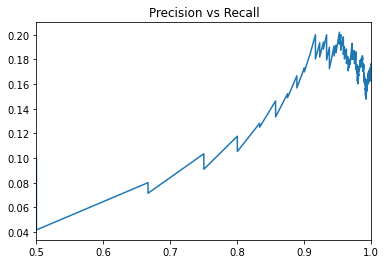

In [ ]:
import matplotlib.pyplot as plt

# calculate TP, FP, FN
print("sometimes the x_test is pandas dataframe but sometimes its np array so it gives error uncomment the below line. From 4.Performance Results. Line 5")
x_test = x_test.to_numpy()
rows, cols = x_test.shape

tp = fp = tn = fn = 0

# loop through test cases
precisions = []
recalls = []
for row_index in range(rows):
  x = x_test[row_index]
  y = y_test[row_index]

  y_hat = predict(x, weights)


# calculate tp, fn, fp, tn to get precision and recall
  # True Positive
  if y_hat == 1 and y == 1:
    tp+=1
  # false negative
  elif y_hat == 1 and y == 0:
    fn+=1
  # false positive
  elif y_hat == 0 and y == 1:
    fp+=1
  # true negative
  else:
    tn+=1
  
  if(tp+fp == 0 or tp+fn == 0):
    continue
  precision = tp/(tp+fp+1)
  recall = tp / (tp+fn+1)

  precisions.append(precision)
  recalls.append(recall)
  

plt.plot(precisions, recalls)
plt.xlim(0.5, 1)
plt.title("Precision vs Recall")